In [61]:
import tarfile
import urllib.request
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle
plt.set_cmap("gray") # Otherwise grayscale images look purple
%matplotlib inline

In [62]:
url = 'http://udon.stacken.kth.se/~ninjin/comp0090_assignment_1_data.tar.gz'
ftpstream = urllib.request.urlopen(url)
tar = tarfile.open(fileobj=ftpstream, mode="r|gz")
tar.extractall()
tar.close

<bound method TarFile.close of <tarfile.TarFile object at 0x0000025DDD722B70>>

In [63]:
trainxs = np.load("comp0090_assignment_1_data/fashion-train-imgs.npz").transpose((2, 1, 0))
trainys = np.load("comp0090_assignment_1_data/fashion-train-labels.npz")
devxs   = np.load("comp0090_assignment_1_data/fashion-dev-imgs.npz").transpose((2, 1, 0))
devys   = np.load("comp0090_assignment_1_data/fashion-dev-labels.npz")
testxs  = np.load("comp0090_assignment_1_data/fashion-test-imgs.npz").transpose((2, 1, 0))
testys  = np.load("comp0090_assignment_1_data/fashion-test-labels.npz")

In [64]:
print(trainxs.shape)
print(trainys.shape)
print(devxs.shape)
print(devys.shape)
print(testxs.shape)
print(testys.shape)

(12000, 28, 28)
(12000,)
(1000, 28, 28)
(1000,)
(1000, 28, 28)
(1000,)


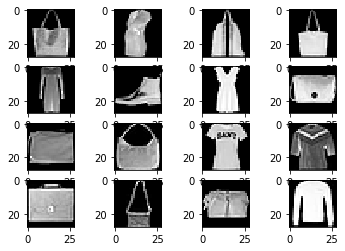

In [65]:
f, axarr = plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        axarr[i, j].imshow(trainxs[np.random.randint(0, len(trainxs))])

In [66]:
# reshape data to make it easier to work with
trainxs = trainxs.reshape(-1, 784)
devxs = devxs.reshape(-1, 784)
testxs = testxs.reshape(-1, 784)

In [67]:
# function to create weight and sum parameters for the algorithm
def initialise_parameters(xs):
    w = np.zeros(xs.shape[1])
    b = 0
    return w, b

In [68]:
def logistic_func(x):
    return 1/(1 + np.exp(-x))

def logistic_der(x):
    return _logistic_func(x) * (1 - _logistic_func(x))

def f(x, w, b):
    return logistic_func(np.dot(w, x) + b)

def p(x, w, b):
    if f(x, w, b) >= 0.5:
        return 1
    return 0

In [72]:
#Measure Accuracy

def accuracy(xs, ys, w, b):
    correct = 0
    for i in range(xs.shape[0]):
        if p(xs[i], w, b) == ys[i]:
            correct += 1
    return correct/len(xs)*100    

In [79]:
def logistic_regression(trainxs, trainys, devxs, devys):
    w, b = initialise_parameters(trainxs)
    
    accuracy_training = []
    accuracy_validation = []
    
    # store old accuracy and consecutive epochs count to detect convergence
    acc_old = accuracy(trainxs, trainys, w, b)
    row_epoch = 0
    
    # store number of epochs to have a nice graph
    epoch = 0
    learning_rate = 0.01
    
    while True:
        print('Epoch', epoch)
        trainxs, trainys = shuffle(trainxs, trainys)
        grad_w, grad_b = initialise_parameters(trainxs)

        for i in range(trainxs.shape[0]):
            y_hat = f(trainxs[i], w, b)
            grad_w -= trainxs[i] * (y_hat - trainys[i])
            grad_b -= y_hat - trainys[i]

        grad_w /= trainxs.shape[0]
        grad_b /= trainxs.shape[0]
        w = learning_rate * grad_w
        b = learning_rate * grad_b

        accuracy_train = accuracy(trainxs, trainys, w, b)
        accuracy_training.append(accuracy_train)
        print('Training set accuracy:', accuracy(trainxs, trainys, w, b))
        accuracy_dev = accuracy(devxs, devys, w, b)
        accuracy_validation.append(accuracy_dev)
        print('Validation set accuracy:', accuracy_dev)
        
        # check if converged
        if np.abs(accuracy_train - acc_old) < 0.1:
            row_epoch += 1
            if row_epoch == 5:
                break
        else:
            row_epoch = 0
            
        acc_old = accuracy_train
        epoch += 1
    
    return epoch, accuracy_training, accuracy_validation

In [80]:
epoch, accuracy_training, accuracy_validation = logistic_regression(trainxs, trainys, devxs, devys)

Epoch 0
Training set accuracy: 55.95833333333333
Validation set accuracy: 56.89999999999999
Epoch 1
Training set accuracy: 63.675000000000004
Validation set accuracy: 64.2
Epoch 2
Training set accuracy: 60.59166666666667
Validation set accuracy: 61.1
Epoch 3
Training set accuracy: 61.675000000000004
Validation set accuracy: 62.1
Epoch 4
Training set accuracy: 61.23333333333333
Validation set accuracy: 61.7
Epoch 5
Training set accuracy: 61.38333333333333
Validation set accuracy: 61.9
Epoch 6
Training set accuracy: 61.34166666666667
Validation set accuracy: 61.8
Epoch 7
Training set accuracy: 61.35
Validation set accuracy: 61.8
Epoch 8
Training set accuracy: 61.34166666666667
Validation set accuracy: 61.8
Epoch 9
Training set accuracy: 61.34166666666667
Validation set accuracy: 61.8
Epoch 10
Training set accuracy: 61.34166666666667
Validation set accuracy: 61.8


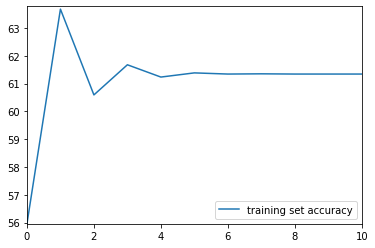

In [81]:
plt.axis([0, epoch, min(accuracy_training), max(accuracy_training) + 0.1])
plt.plot(accuracy_training, label='training set accuracy')
plt.legend(loc='lower right')

In [82]:
ind = accuracy_validation.index(max(accuracy_validation))
print("Best epoch =", ind)
print("Accuracy on training set =", accuracy_training[ind])
print("Accuracy on validation set =", accuracy_validation[ind])

Best epoch = 1
Accuracy on training set = 63.675000000000004
Accuracy on validation set = 64.2
